### Building a linear regression model


Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from sklearn import linear_model

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")




In [59]:
#import the crime raw crime data without headers/footers and replace null values with zeroes
crime_raw = pd.read_csv(filepath_or_buffer='table_8_offenses_no_header_footer.csv', delimiter=',')
#crime_raw.fillna(value=0)
column_list = list(crime_raw.columns.values)
print(column_list)
#print(crime_raw.head())
print(len(crime_raw))

['City', 'Population', 'Violent_Crime', 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft', 'vehicle_theft', 'Arson']
348


In [60]:
# Create a features dataframe that converts values to floats from strings, creates categorical values for murder and robbery 
# and creates a populations squared feature

crime_raw['Robbery']= crime_raw['Robbery'].str.replace(",","").astype(float)
crime_raw['Property_crime']= crime_raw['Property_crime'].str.replace(",","").astype(float)

crime_features = pd.DataFrame()
crime_features['population'] = crime_raw['Population'].str.replace(",","").astype(float)
crime_features['population_squared'] = crime_features['population'] ** 2
crime_features['murder'] = np.where(crime_raw['Murder_and_Manslaughter'] > 0, 1,0)
crime_features['robbery'] = np.where(crime_raw['Robbery'] > 0, 1,0)

crime_features.head()


,population,population_squared,murder,robbery
0,1861.000,3463321.000,0,0
1,2577.000,6640929.000,0,0
2,2846.000,8099716.000,0,0
3,97956.000,9595377936.000,1,1
4,6388.000,40806544.000,0,1


C:\Users\stace\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


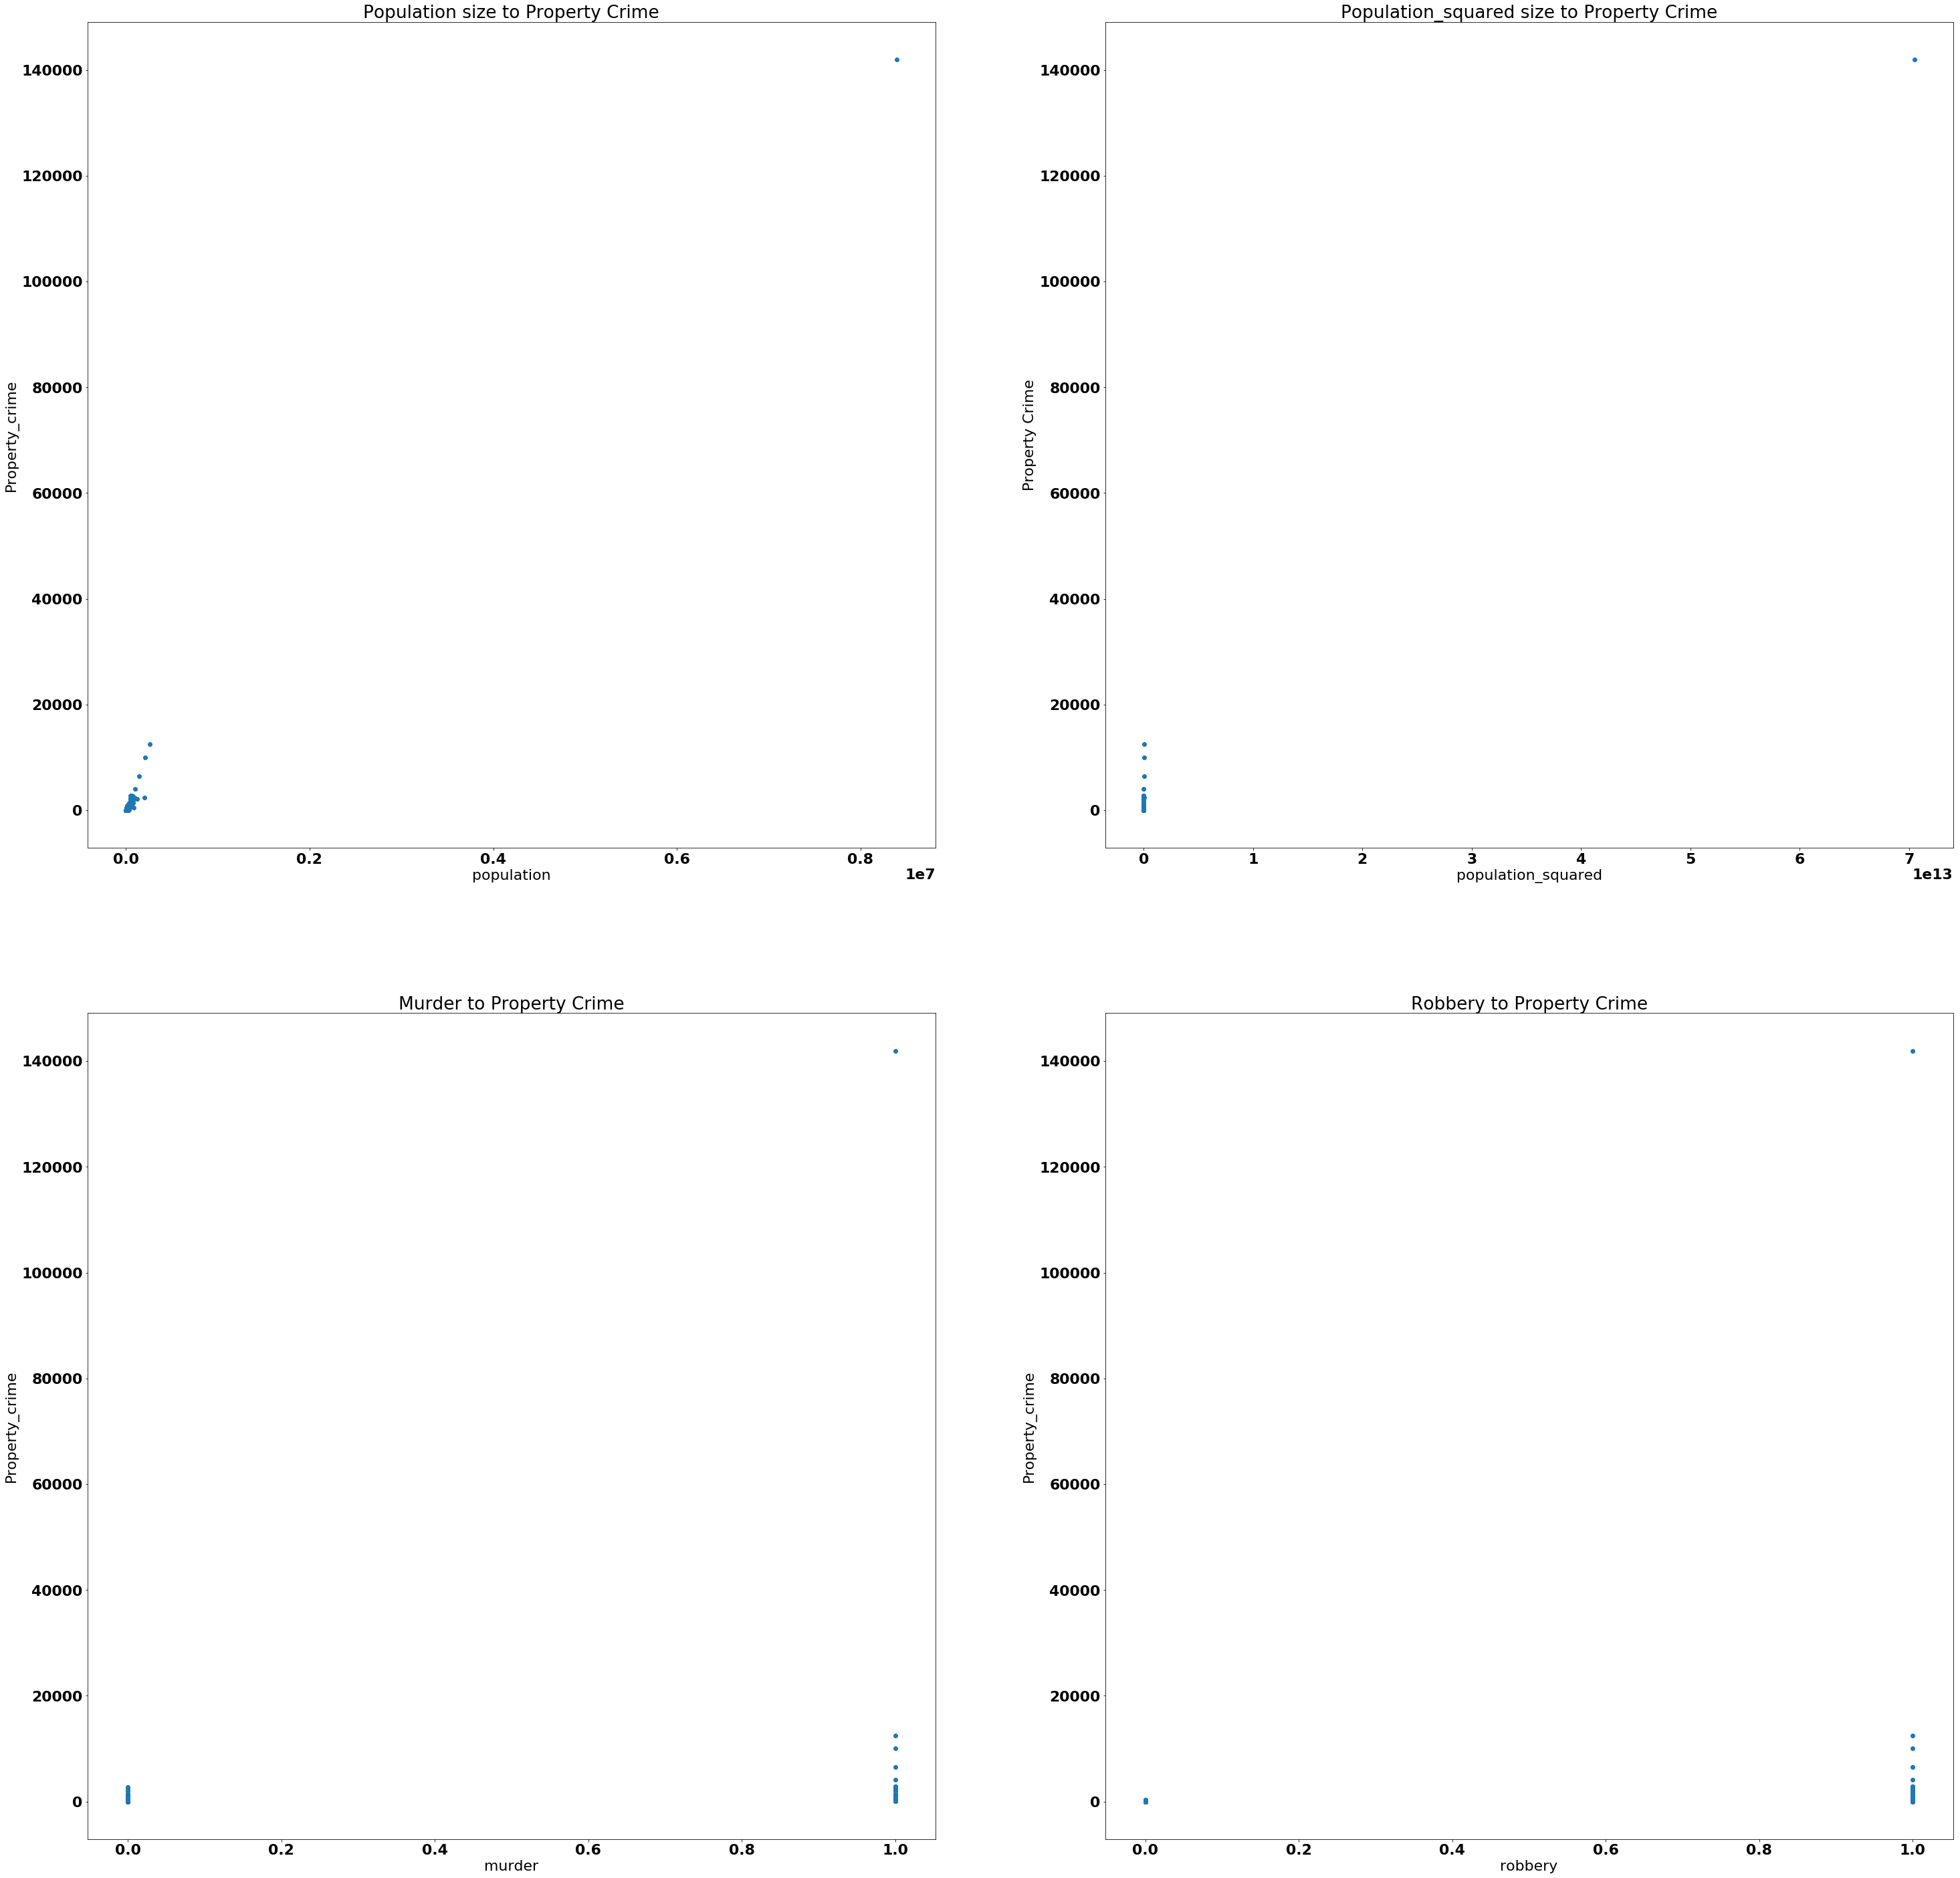

In [61]:

# scatter plot of each feature to property_crime
f, ax = plt.subplots(figsize=(50,50))
font = {'family':'normal','weight': 'bold','size': 22}

matplotlib.rc('font', **font)

ax1 = plt.subplot(221)
plt.scatter(crime_features['population'], crime_raw['Property_crime'])
ax1.set_title("Population size to Property Crime")
ax1.set_xlabel("population")
ax1.set_ylabel("Property_crime")

ax2 = plt.subplot(222)
plt.scatter(crime_features['population_squared'], crime_raw['Property_crime'])
ax2.set_title("Population_squared size to Property Crime")
ax2.set_xlabel("population_squared")
ax2.set_ylabel("Property Crime")

ax3 = plt.subplot(223)
plt.scatter(crime_features['murder'], crime_raw['Property_crime'])
ax3.set_title("Murder to Property Crime")
ax3.set_xlabel("murder")
ax3.set_ylabel("Property_crime")

ax4 = plt.subplot(224)
plt.scatter(crime_features['robbery'], crime_raw['Property_crime'])
ax4.set_title("Robbery to Property Crime")
ax4.set_xlabel("robbery")
ax4.set_ylabel("Property_crime")

plt.show()


In [62]:
#Property_crime=α+Population+Population2+Murder+Robbery
# try original model with outliers
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(crime_features, crime_raw['Property_crime'])


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(crime_features, crime_raw['Property_crime']))


Coefficients: 
 [  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]

Intercept: 
 -109.575335623

R-squared:
0.996124710499


#### R-squared value suggests a problem with over-fitting and there are obvious outliers from the plots. Next I'll try removing the outliers that fall beyond 1.5x the IQR for the property crime values

In [63]:
# Obvious outliers in plots. Try removing property crime outliers (based on 1.5x)

#sort values 
crime_raw.sort_values('Property_crime', inplace=True) 

#identify IQR for sqft_living 
Q1_property_crime = crime_raw['Property_crime'].quantile(0.25) 
Q3_property_crime = crime_raw['Property_crime'].quantile(0.75) 
IQR_property_crime = Q3_property_crime - Q1_property_crime


df_crime_minus_outliers = crime_raw.query('(@Q1_property_crime - 1.5 * @IQR_property_crime) <= Property_crime <= (@Q3_property_crime + 1.5 * @IQR_property_crime)')

In [64]:
# create new features based on dataset without outliers
crime_features_minus_outliers = pd.DataFrame()
crime_features_minus_outliers['population'] = df_crime_minus_outliers['Population'].str.replace(",","").astype(float)
crime_features_minus_outliers['population_squared'] = crime_features_minus_outliers['population'] ** 2
crime_features_minus_outliers['murder'] = np.where(df_crime_minus_outliers['Murder_and_Manslaughter'] > 0, 1,0)
crime_features_minus_outliers['robbery'] = np.where(df_crime_minus_outliers['Robbery'] > 0, 1,0)


C:\Users\stace\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


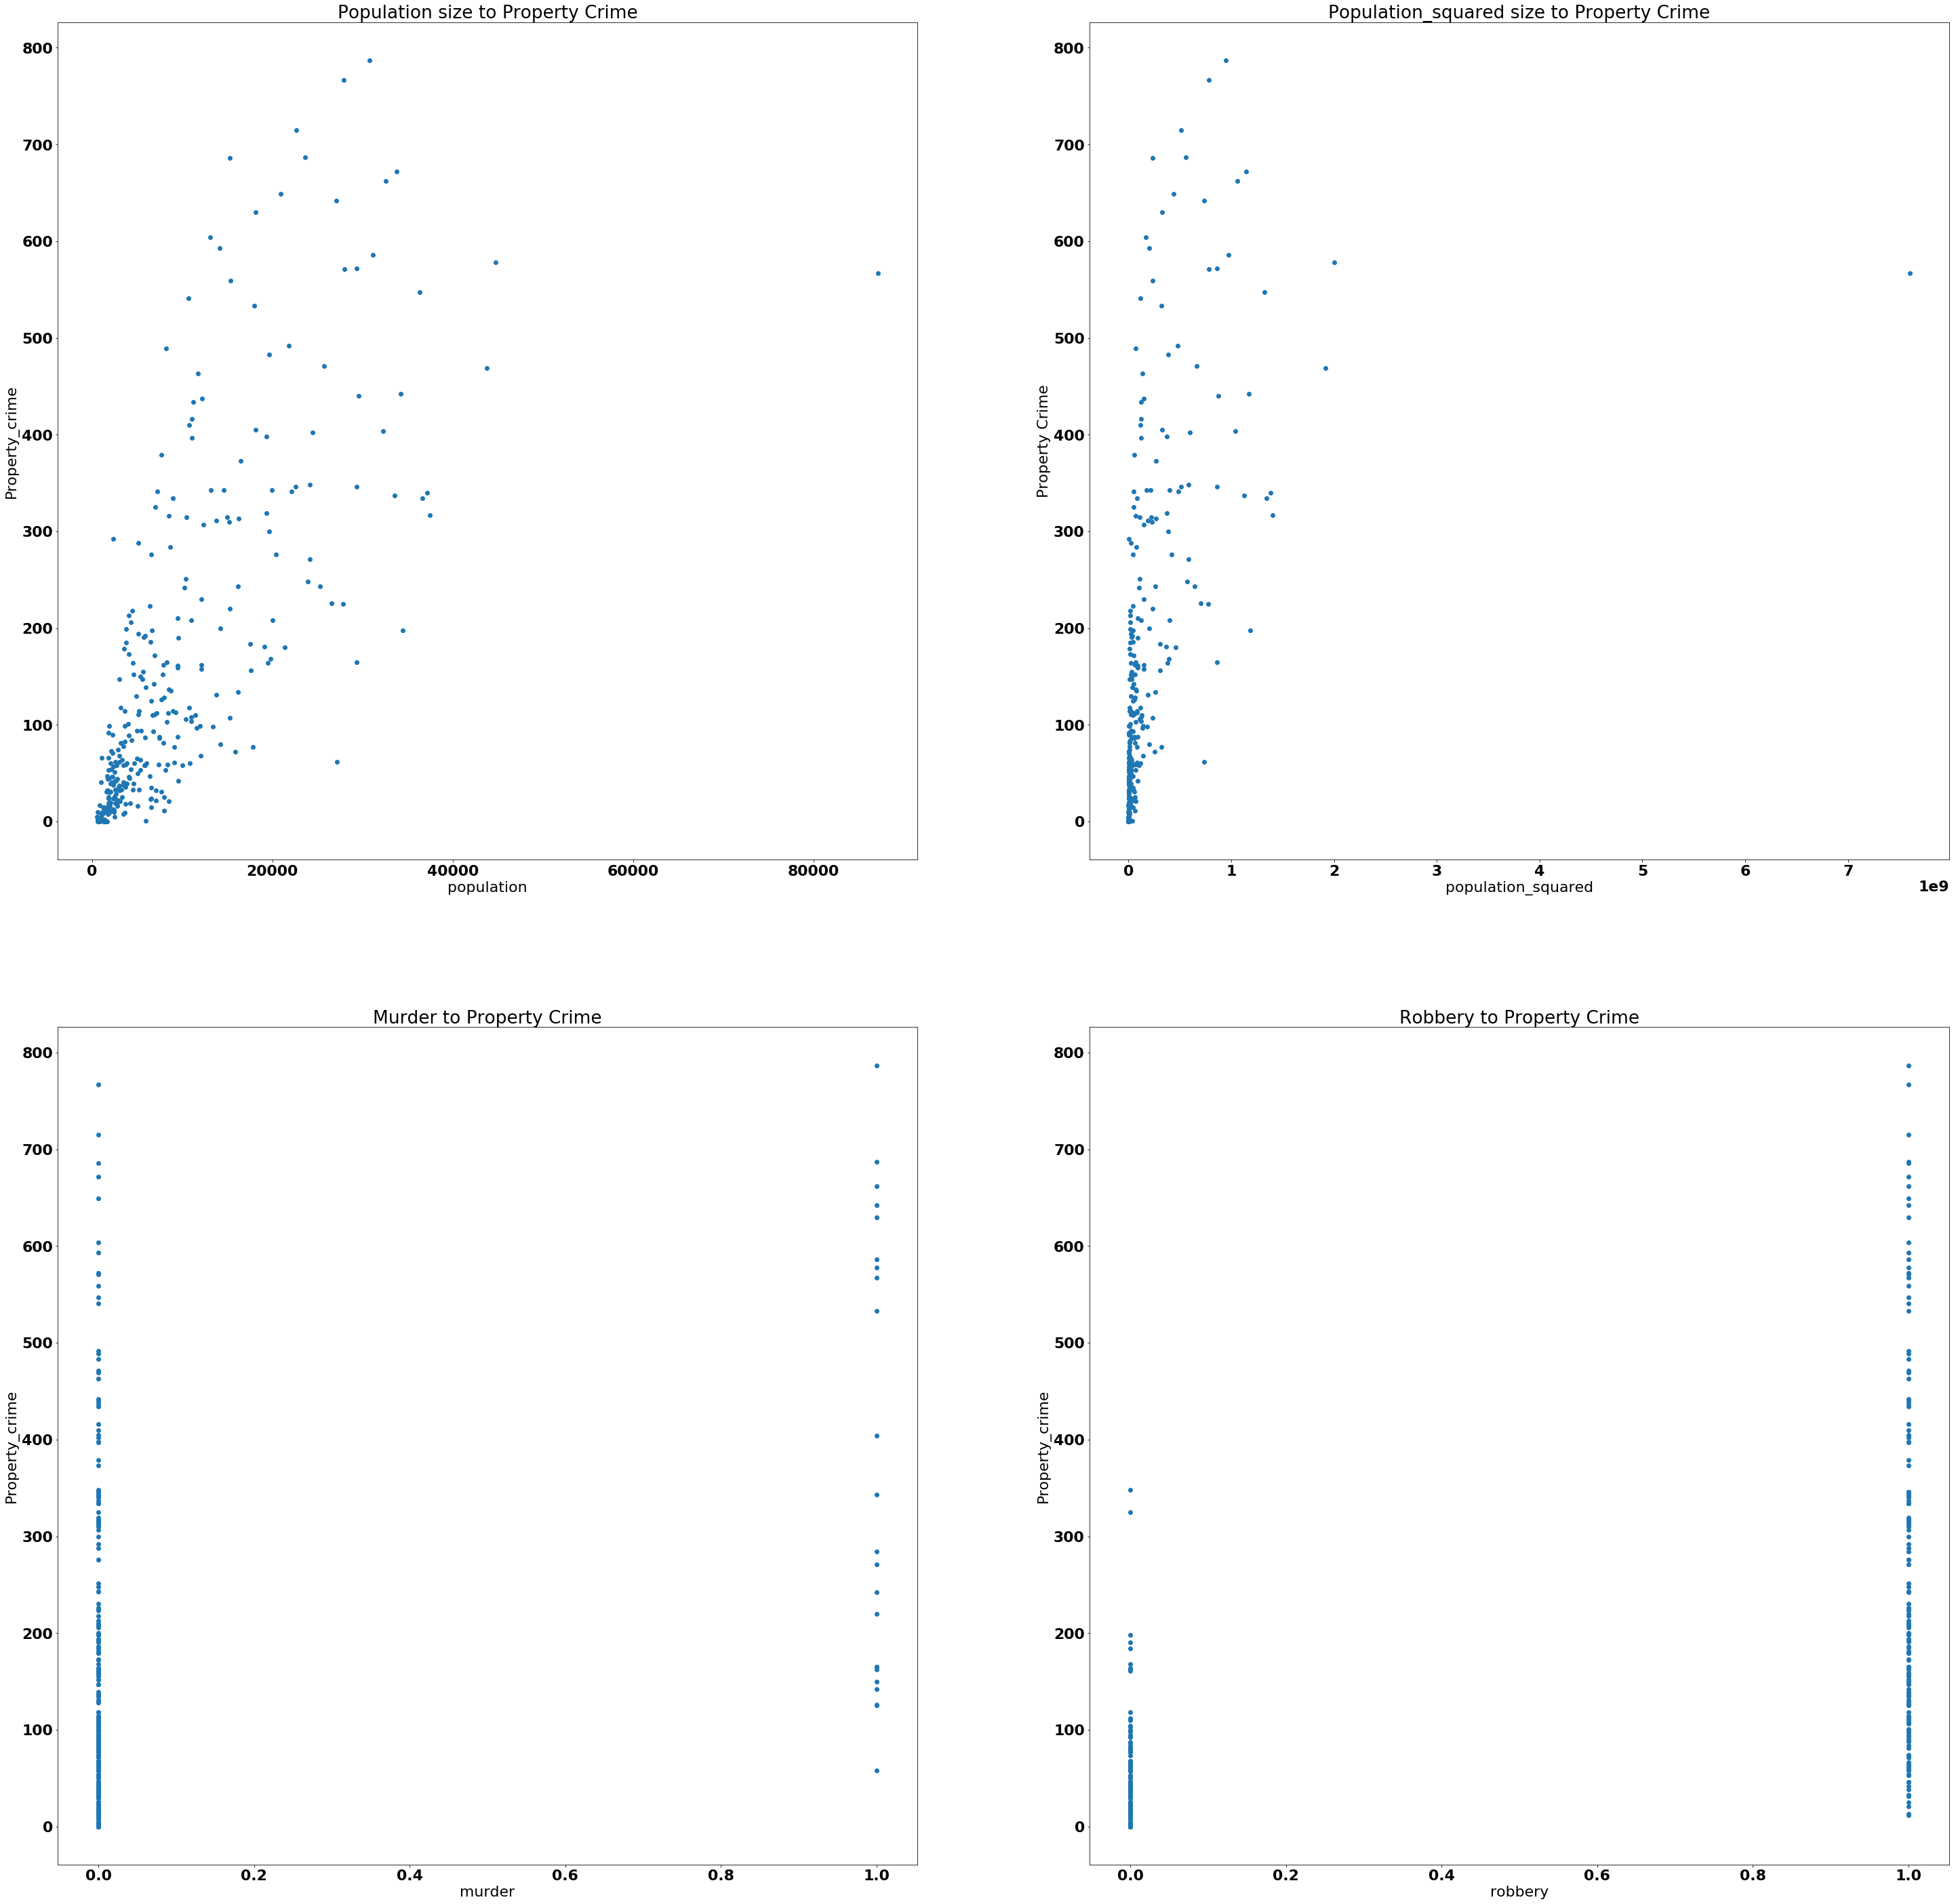

In [65]:


# scatter plot of each feature
f, ax = plt.subplots(figsize=(50,50))
font = {'family':'normal','weight': 'bold','size': 22}

matplotlib.rc('font', **font)

ax1 = plt.subplot(221)
plt.scatter(crime_features_minus_outliers['population'], df_crime_minus_outliers['Property_crime'])
ax1.set_title("Population size to Property Crime")
ax1.set_xlabel("population")
ax1.set_ylabel("Property_crime")

ax2 = plt.subplot(222)
plt.scatter(crime_features_minus_outliers['population_squared'], df_crime_minus_outliers['Property_crime'])
ax2.set_title("Population_squared size to Property Crime")
ax2.set_xlabel("population_squared")
ax2.set_ylabel("Property Crime")

ax3 = plt.subplot(223)
plt.scatter(crime_features_minus_outliers['murder'], df_crime_minus_outliers['Property_crime'])
ax3.set_title("Murder to Property Crime")
ax3.set_xlabel("murder")
ax3.set_ylabel("Property_crime")

ax4 = plt.subplot(224)
plt.scatter(crime_features_minus_outliers['robbery'], df_crime_minus_outliers['Property_crime'])
ax4.set_title("Robbery to Property Crime")
ax4.set_xlabel("robbery")
ax4.set_ylabel("Property_crime")

plt.show()


In [66]:
#Property_crime=α+Population+Population2+Murder+Robbery
# try model with removed outliers
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(crime_features_minus_outliers, df_crime_minus_outliers['Property_crime'])


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(crime_features_minus_outliers, df_crime_minus_outliers['Property_crime']))


Coefficients: 
 [  1.56151945e-02  -1.25917789e-07   5.90140167e+01   9.06648998e+01]

Intercept: 
 -17.5921519396

R-squared:
0.640950289152


##### removing outliers outside 1.5x IQR substantially lowered the R-squared value. It's possible that just removing NYC - which is 32x bigger than the next highest population in Buffalo (and has a property crime rate 11x higher) could lead to a better model

In [67]:
# remove just NYC

df_crime_minus_nyc = crime_raw[crime_raw.City != 'New York']
print(len(df_crime_minus_nyc))

crime_features_minus_nyc = pd.DataFrame()
crime_features_minus_nyc['population'] = df_crime_minus_nyc['Population'].str.replace(",","").astype(float)
crime_features_minus_nyc['population_squared'] = crime_features_minus_nyc['population'] ** 2
crime_features_minus_nyc['murder'] = np.where(df_crime_minus_nyc['Murder_and_Manslaughter'] > 0, 1,0)
crime_features_minus_nyc['robbery'] = np.where(df_crime_minus_nyc['Robbery'] > 0, 1,0)


347


C:\Users\stace\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


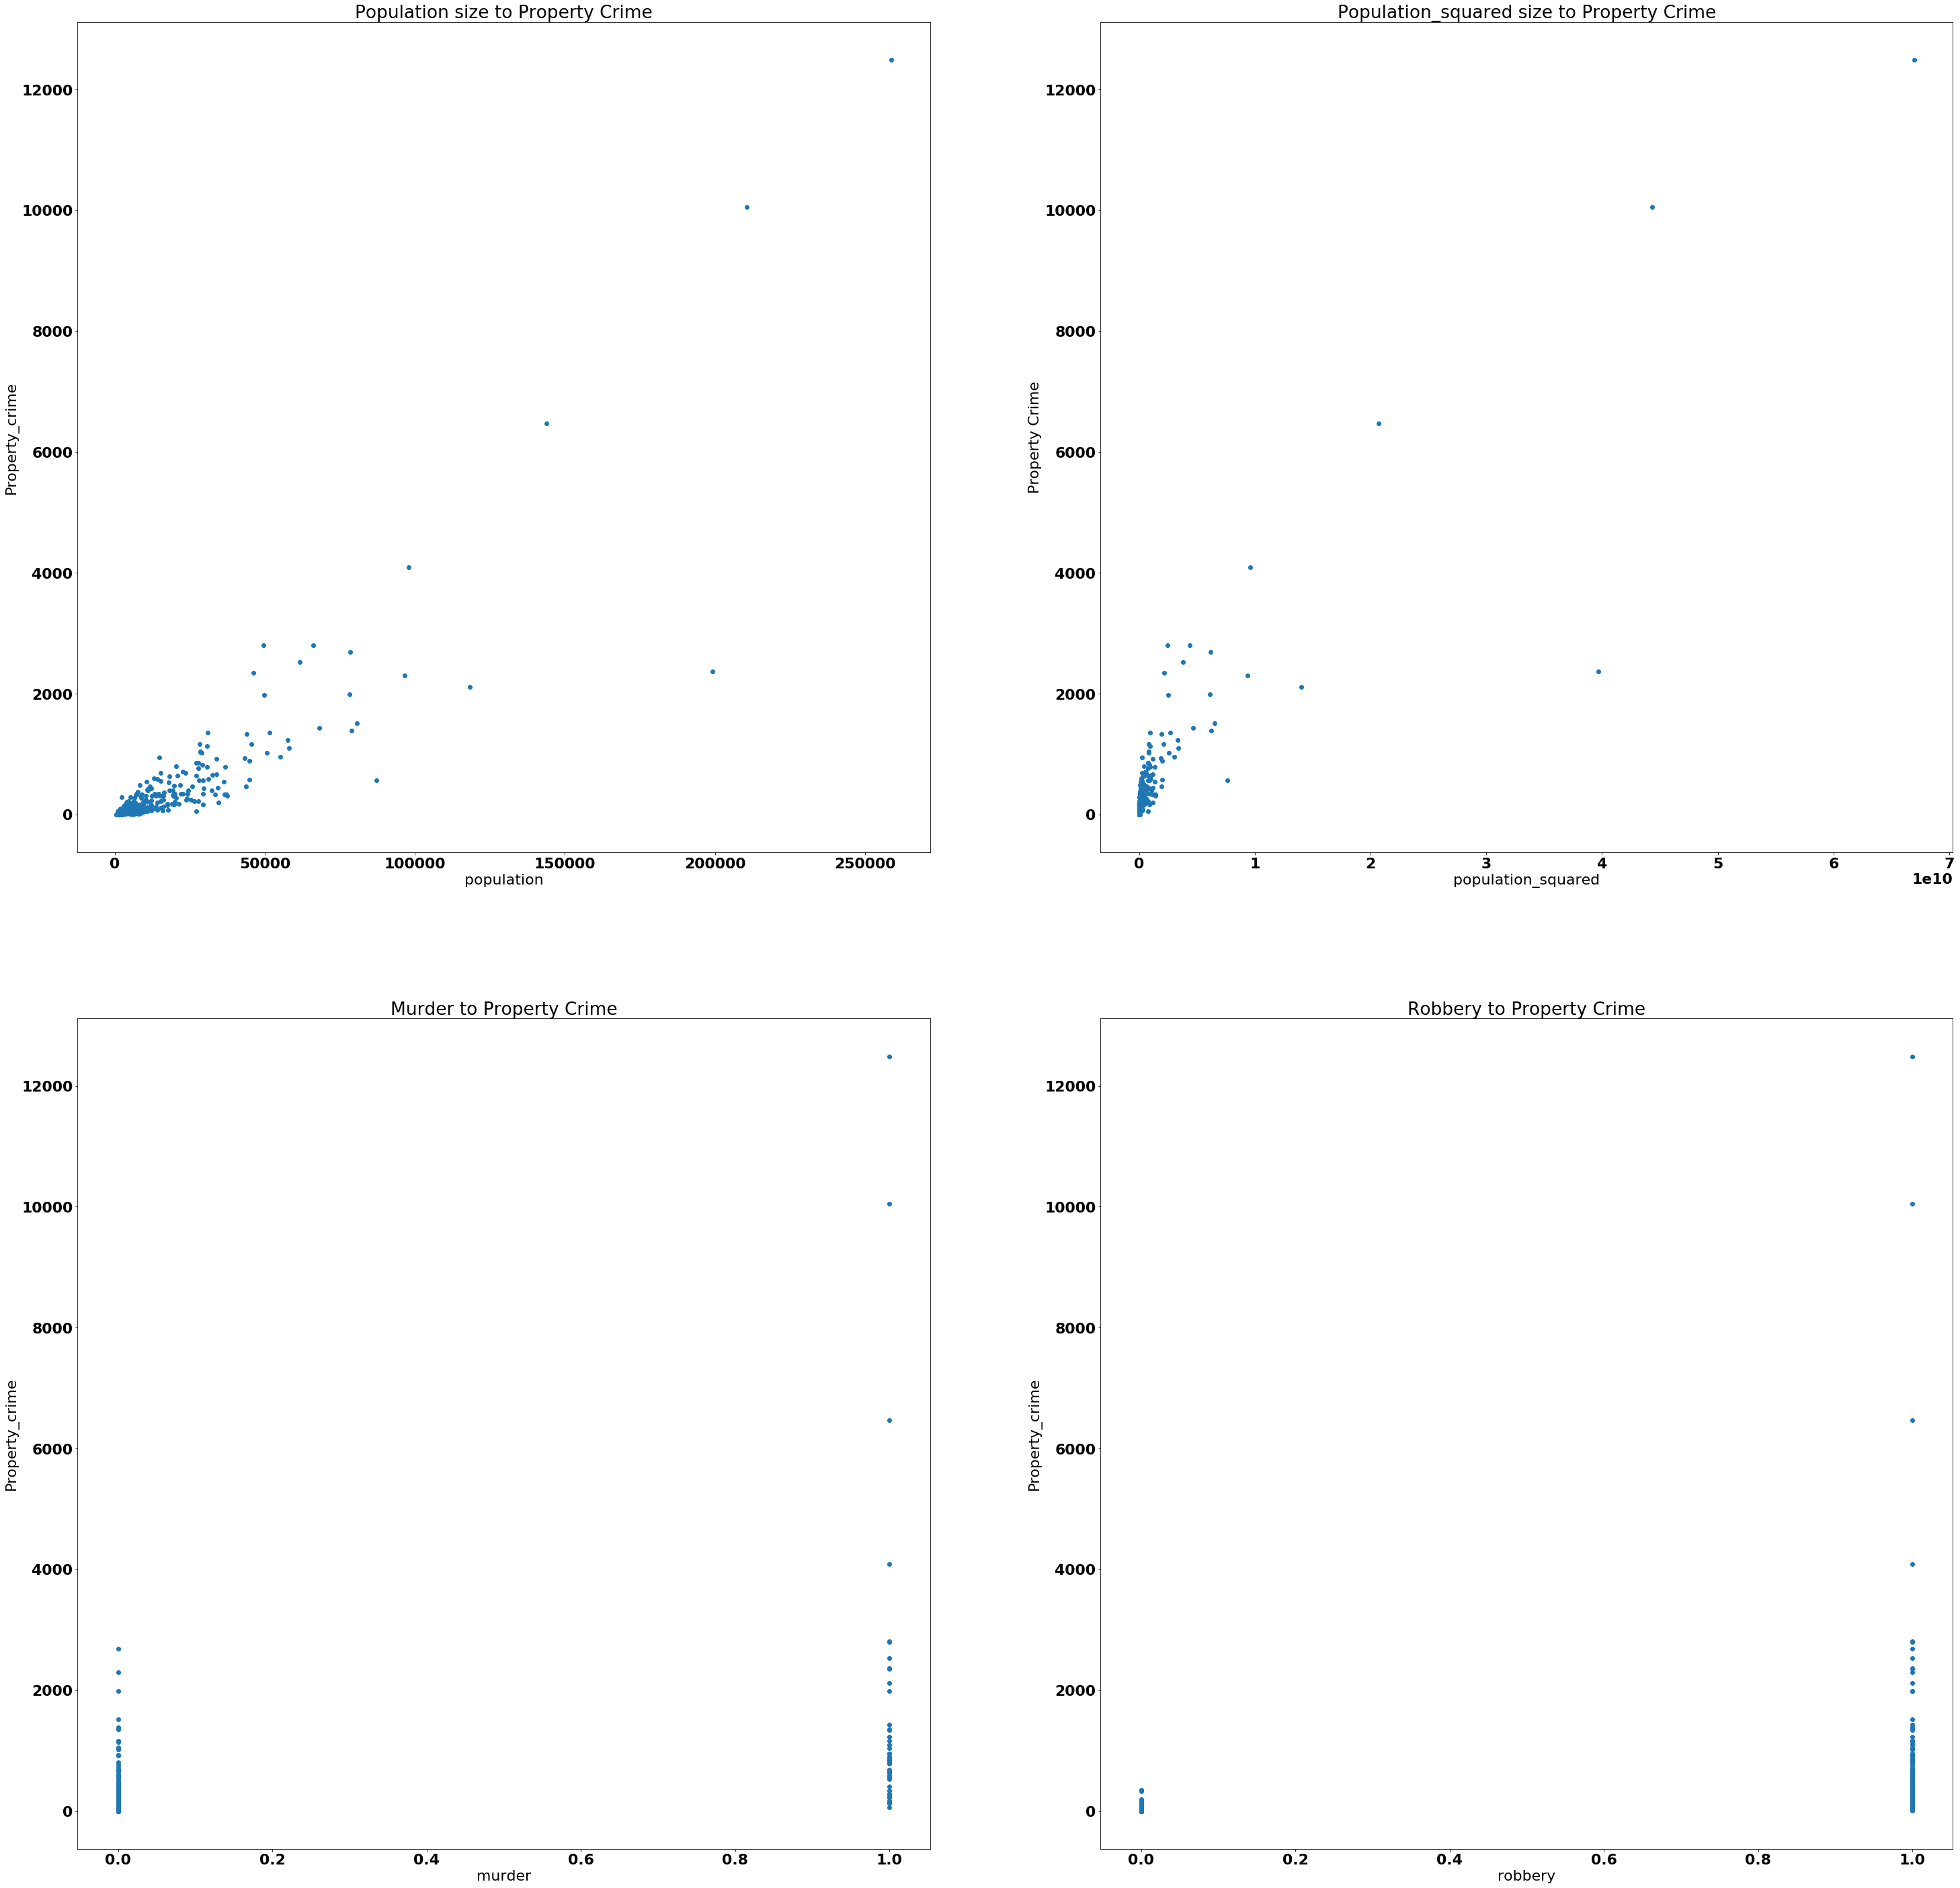

In [68]:

# scatter plot of each feature
f, ax = plt.subplots(figsize=(50,50))
font = {'family':'normal','weight': 'bold','size': 22}

matplotlib.rc('font', **font)

ax1 = plt.subplot(221)
plt.scatter(crime_features_minus_nyc['population'], df_crime_minus_nyc['Property_crime'])
ax1.set_title("Population size to Property Crime")
ax1.set_xlabel("population")
ax1.set_ylabel("Property_crime")

ax2 = plt.subplot(222)
plt.scatter(crime_features_minus_nyc['population_squared'], df_crime_minus_nyc['Property_crime'])
ax2.set_title("Population_squared size to Property Crime")
ax2.set_xlabel("population_squared")
ax2.set_ylabel("Property Crime")

ax3 = plt.subplot(223)
plt.scatter(crime_features_minus_nyc['murder'], df_crime_minus_nyc['Property_crime'])
ax3.set_title("Murder to Property Crime")
ax3.set_xlabel("murder")
ax3.set_ylabel("Property_crime")

ax4 = plt.subplot(224)
plt.scatter(crime_features_minus_nyc['robbery'], df_crime_minus_nyc['Property_crime'])
ax4.set_title("Robbery to Property Crime")
ax4.set_xlabel("robbery")
ax4.set_ylabel("Property_crime")

plt.show()

In [69]:
#Property_crime=α+Population+Population2+Murder+Robbery
# try model with removed outliers
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(crime_features_minus_nyc, df_crime_minus_nyc['Property_crime'])


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(crime_features_minus_nyc, df_crime_minus_nyc['Property_crime']))


Coefficients: 
 [  1.29510871e-02   1.14920528e-07   1.95038666e+02   9.28205845e+01]

Intercept: 
 -16.8158663217

R-squared:
0.844493761117


#### Removing NYC substantially improves the models ability to explain the variance (r-squared = .84)

### Feature Engineering and Selection process
1. Removing NYC as an outlier improved the results of the model
2. I tried removing and substituting various features to further improve the model but ultimately kept the original feature set as it already performed well